In [1]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [2]:
deg = 7
c = 1.5
lam = 0.1

0.1

In [3]:
coeffs_dict = readstring("./results_Tiergarten/coeffs_dict_Tiergarten.json")
coeffs_dict = JSON.parse(coeffs_dict)

Dict{String,Any} with 1 entry:
  "(7,1.5,0.1,1)" => Any[1.0,0.0072941,-0.101282,0.423573,0.464823,0.17654,0.02…

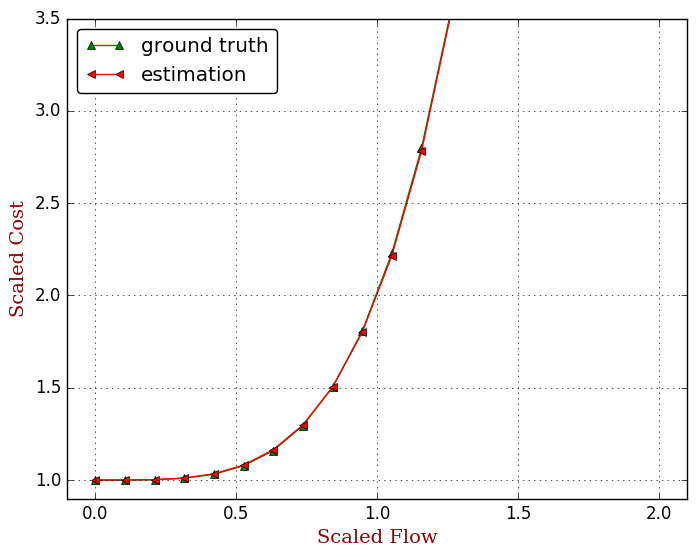

In [4]:
using PyPlot

iterN = 1

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict["($deg,$c,$lam,$iterN)"]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"darkred","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results_Tiergarten/fitting_Tiergarten_iter_$(iterN)_multi_class.pdf")